<a href="https://colab.research.google.com/github/FJWangYantao/FJWangYantao.github.io/blob/main/Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
(train_images,train_labels),_=mnist.load_data()

#train_images=train_images.reshape((60000,28*28))

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype("float32")/255
train_images_with_noise_channels=np.concatenate(
    [train_images,
     np.random.random((len(train_images),784))],axis=1)
train_images_with_zeros_channels=np.concatenate(
    [train_images,np.zeros((len(train_images),784))],axis=1
)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
  ])
  model.compile(
      optimizer="rmsprop",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
  )
  return model

In [12]:
model=get_model()
history_noise=model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model=get_model()
history_zeros=model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.2984 - accuracy: 0.9131 - val_loss: 0.1645 - val_accuracy: 0.9526
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1261 - accuracy: 0.9638 - val_loss: 0.1086 - val_accuracy: 0.9681
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0911 - val_accuracy: 0.9724
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0592 - accuracy: 0.9827 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0857 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0260 - accuracy: 0.9925 - val_loss: 0.0749 - val_accuracy: 0.9791

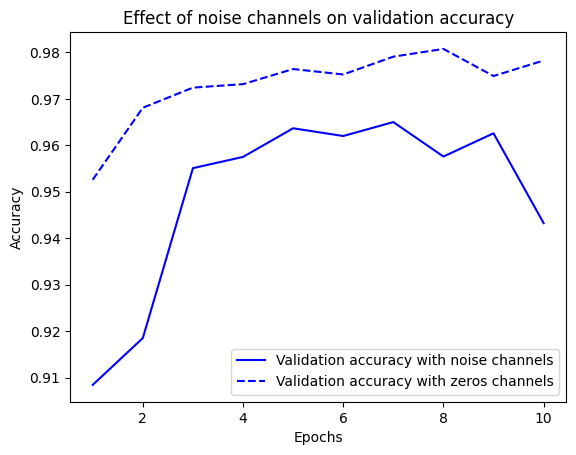

In [14]:
import matplotlib.pyplot as plt
val_acc_noise=history_noise.history["val_accuracy"]
val_acc_zeros=history_zeros.history["val_accuracy"]
epochs=range(1,11)
plt.plot(epochs,val_acc_noise,"b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs,val_acc_zeros,"b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()